In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
COLORMAP = 'gist_rainbow'
DEFAULT_M = 2**32
DEFAULT_A = 1103515245
DEFAULT_C = 12345
LAMBDA = 1.5
SAMPLES_AMOUNT = 50000
QUARTER_OF_PI = np.pi / 4

In [18]:
def lcg(m=DEFAULT_M, a=DEFAULT_A, c=DEFAULT_C):
    lcg.current = (a * lcg.current + c) % m
    return lcg.current / m

def apply_colormap(bins, patches):
    cm = plt.cm.get_cmap(COLORMAP)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)

    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))

def plot_graph(sequence, set_xticks=True):
    plt.rcParams["figure.figsize"] = (20, 10)
    n, bins, patches = plt.hist(sequence, bins=20)
    if set_xticks: plt.xticks(np.arange(0, 1.05, 0.05))
    #plt.axhline(y=2500, color='r', linestyle='-')
    apply_colormap(bins, patches)
    
    plt.show()
    
def get_math_values(sequence):
    array = np.array(sequence)
    
    mean = array.mean()
    dispersion = array.var()
    sig = array.std()
    
    print(f"Мат. ожидание:                {mean}")
    print(f"Дисперсия:                    {dispersion}")
    print(f"Среднее квадратическое откл.: {sig}")

# Равномерное распеределение

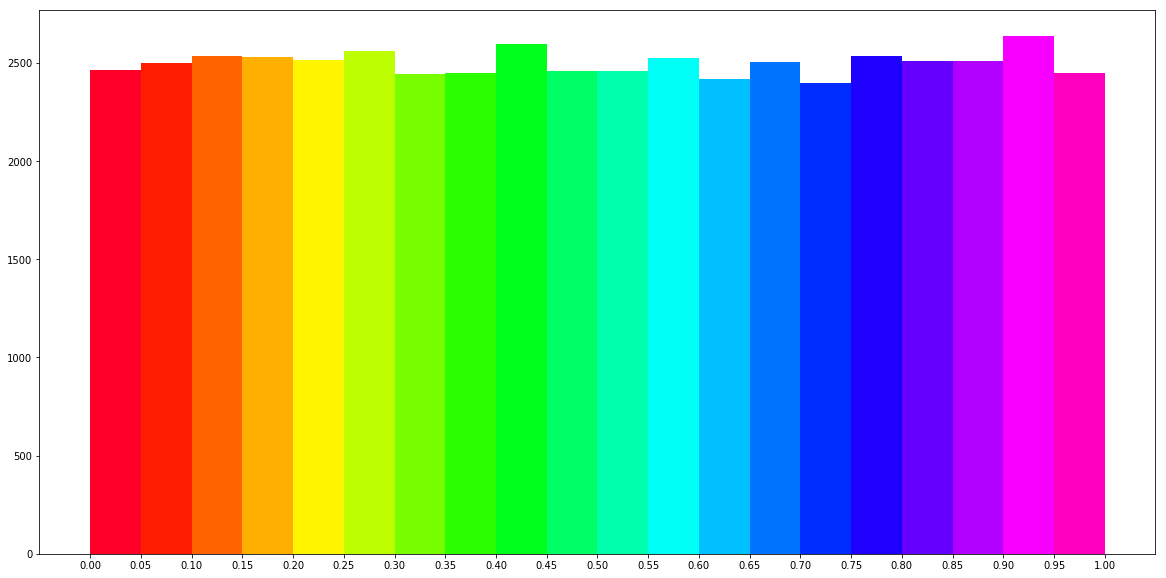

Мат. ожидание:                0.5000552520212158
Дисперсия:                    0.08361601619461773
Среднее квадратическое откл.: 0.2891643411532925


In [19]:
lcg.current = 1
sequence_rr = [lcg() for i in range(SAMPLES_AMOUNT)]
plot_graph(sequence_rr)
get_math_values(sequence_rr)

# Непрерывное распределение

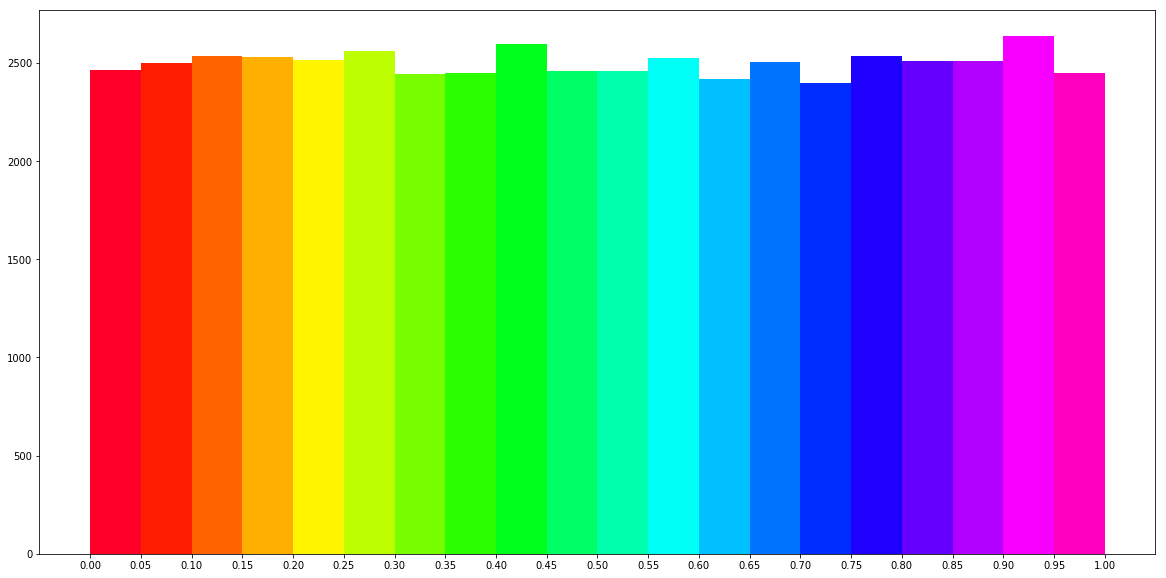

Мат. ожидание:                0.5000552520212158
Дисперсия:                    0.08361601619461773
Среднее квадратическое откл.: 0.2891643411532925


In [20]:
def uniform_distribution(R, a = 0, b = 1):
    return list(map(lambda x: a + x * (b - a), R))

sequence = uniform_distribution(sequence_rr)
plot_graph(sequence)
get_math_values(sequence)

# Распределение Гаусса

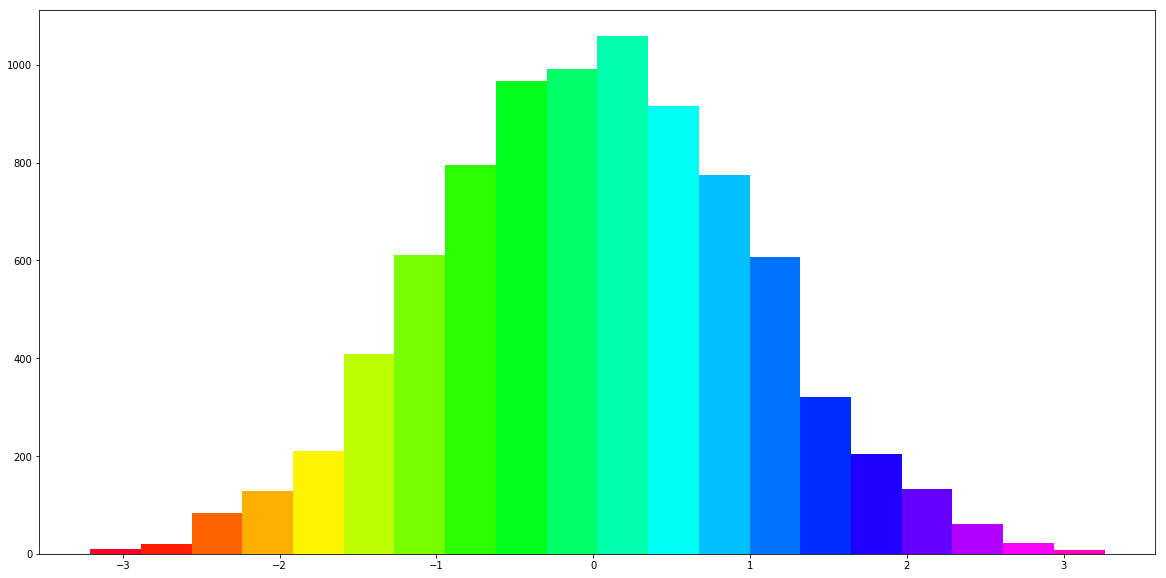

Мат. ожидание:                0.00048081757700744245
Дисперсия:                    1.0058387629288716
Среднее квадратическое откл.: 1.0029151324657892


In [21]:
def gauss_distibution(R, mean=0, sig=1, n=6):
    sequence = [R[i * n:i * n + n] for i in range(int(len(R) / n))]
    return list(map(lambda x: mean + sig * np.sqrt(12 / n) * (sum(x) - n / 2), sequence))

sequence_gauss = gauss_distibution(sequence_rr)
plot_graph(sequence_gauss, set_xticks=False)
get_math_values(sequence_gauss)

# Экспоненциальное распределение

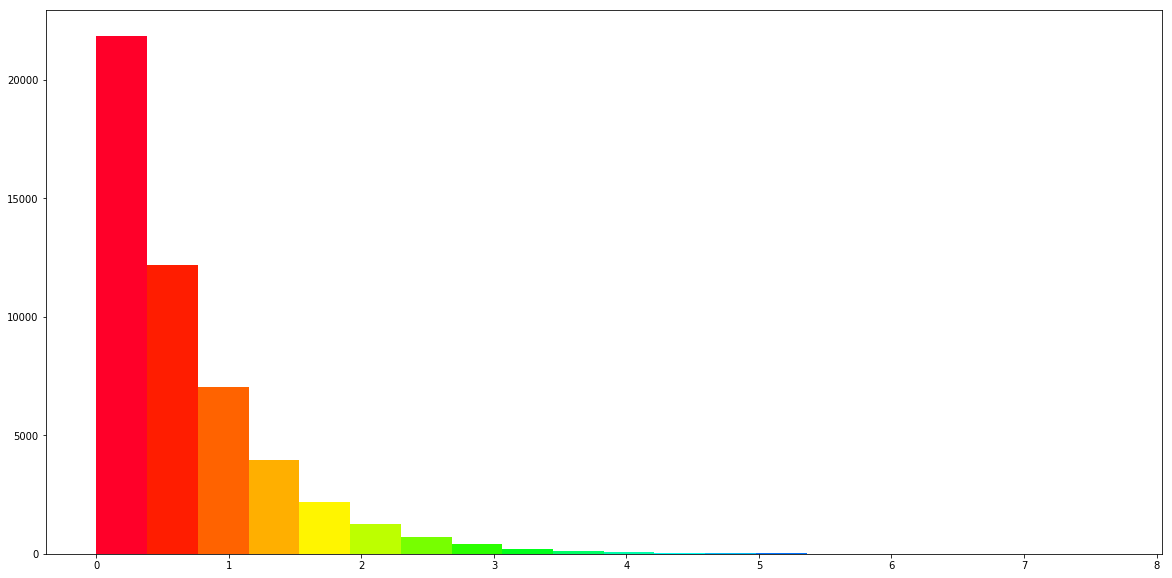

Мат. ожидание:                0.6662242363383752
Дисперсия:                    0.4421182615566301
Среднее квадратическое откл.: 0.6649197406880247


In [22]:
def exponent_distribution(R, lamb=LAMBDA):
    return list(map(lambda x: -1 / lamb * np.log(x), R))

sequence_exp = exponent_distribution(sequence_rr)
plot_graph(sequence_exp, set_xticks=False)
get_math_values(sequence_exp)

# Гамма-распределение

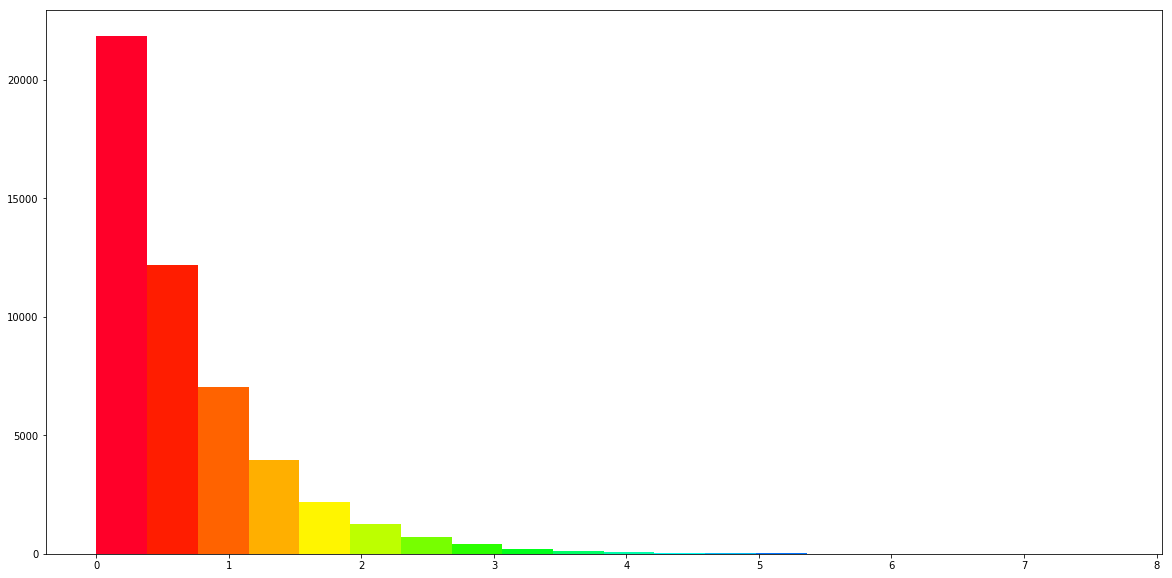

Мат. ожидание:                0.6662242363383752
Дисперсия:                    0.4421182615566301
Среднее квадратическое откл.: 0.6649197406880247


In [23]:
def gamma_distribution(R, lamb=LAMBDA, eta=1):
    def product(x):
        if eta == 1: return x
        result = 1
        for i in range(R.index(x), R.index(x) + eta):
            result *= R[i]
        return result
    
    return list(map(lambda x: -1 / lamb * np.log(product(x)), R))

sequence_gamma = gamma_distribution(sequence_rr)
plot_graph(sequence_gamma, set_xticks=False)
get_math_values(sequence_gamma)

# Треугольное распределение

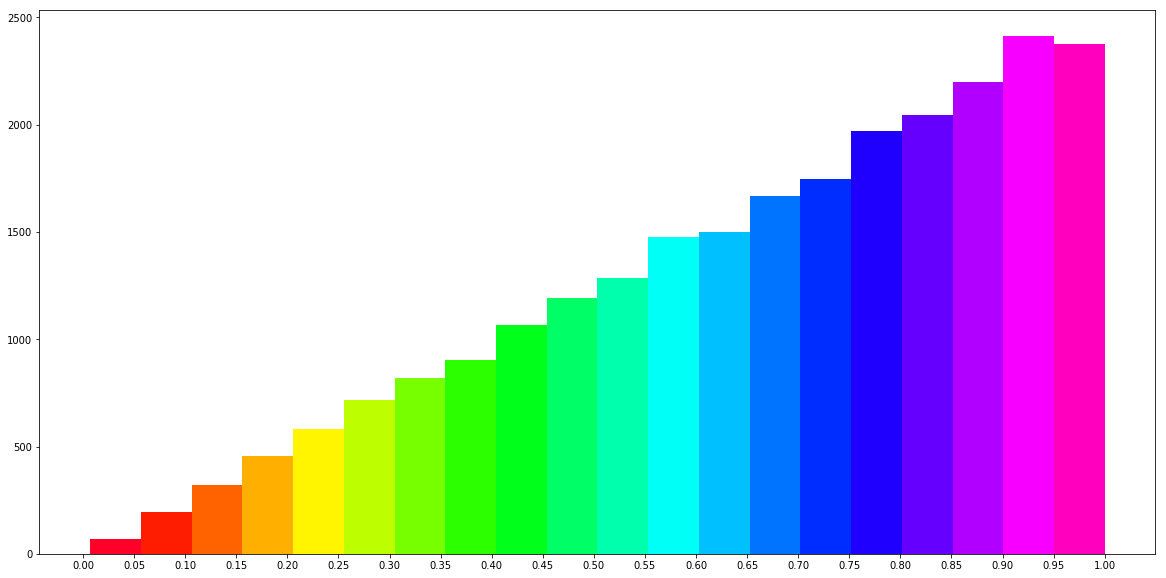

Мат. ожидание:                0.6678296509040613
Дисперсия:                    0.055500777283893694
Среднее квадратическое откл.: 0.23558602947520826


In [24]:
def triangle_distribution(R, a = 0, b = 1, order=max):
    pairs = [(R[i], R[i + 1]) for i in range(0, len(R), 2)]    
    return list(map(lambda pair: a + (b - a) * order(pair), pairs))

sequence_treugol = triangle_distribution(sequence_rr, order=max)
plot_graph(sequence_treugol)
get_math_values(sequence_treugol)

# Распределение Симпсона

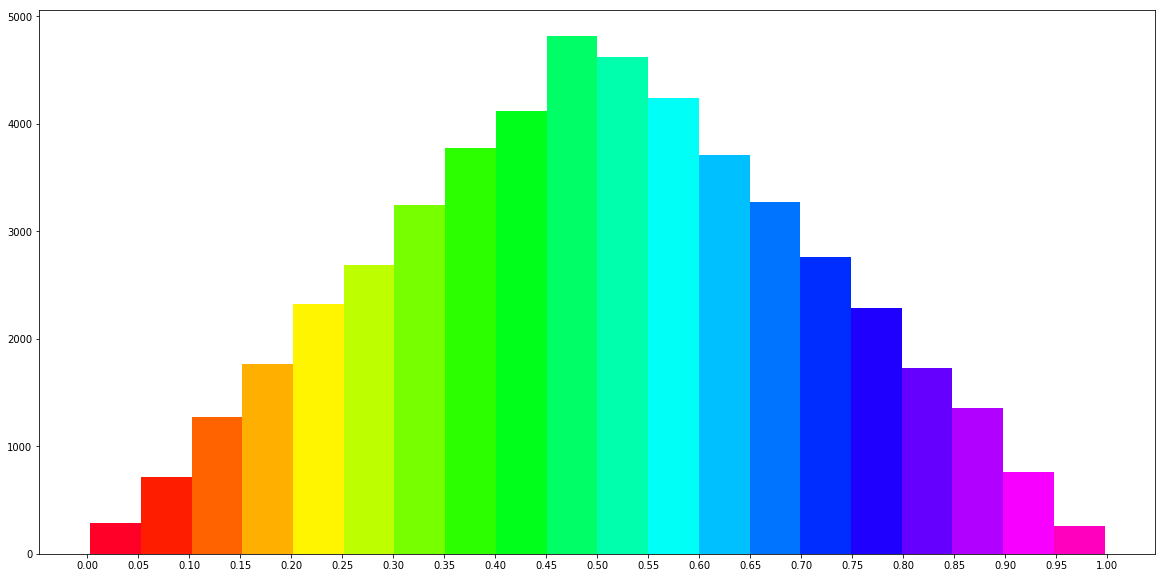

Мат. ожидание:                0.5006523208790078
Дисперсия:                    0.04182765812341531
Среднее квадратическое откл.: 0.20451811196912442


In [25]:
def simpson_distribution(a = 0, b = 1):
    return sum(np.random.uniform(a / 2, b / 2, 2))

sequence_simpson = [simpson_distribution() for i in range(SAMPLES_AMOUNT)]
plot_graph(sequence_simpson)
get_math_values(sequence_simpson)